<p style="text-align: right;"> &#9989; Put your name here</p>

# <p style="text-align: center;"> In-Class Assignment 24: Programming Quantum Computers </p>

In this assignment, we'll use what we learned about quantum bits and quantum circuits in previous assignments to do useful computation. We'll continue using Qiskit to write quantum algorithms (i.e., algorithms for quantum computers). You'll use a quantum computer simulator to test your algorithms, and you'll even get the chance to run the algorithms you wrote on real quantum computers!

## <p style="text-align: center;"> Itinerary </p>

<table align="center" style="width:50%">
  <tr>
    <td style="text-align:center"><b>Assignment</b></td>
    <td style="text-align:center"><b>Topic</b></td>
    <td style="text-align:center"><b>Description</b></td>
  </tr>
  <tr>
    <td style="text-align:center">Pre Class 23</td>
    <td style="text-align:center">Background for Quantum Computing</td>
    <td style="text-align:center">How Computers Store Information</td>
  </tr>
  <tr>
    <td style="text-align:center">In Class 23</td>
    <td style="text-align:center">Classsical and Quantum Bits</td>
    <td style="text-align:center">Information in Quantum States</td>
  </tr>
  <tr>
      <td style="text-align:center">Pre Class 24</td>
      <td style="text-align:center">Software for Quantum Computing</td>
      <td style="text-align:center">High Level Software and the Circuit Model</td>
  </tr>
  <tr>
      <td bgcolor="yellow" style="text-align:center">In Class 24</td>
      <td bgcolor="yellow" style="text-align:center">Programming Quantum Computers</td>
      <td bgcolor="yellow" style="text-align:center">Manipulating Quantum Bits to Perform Useful Computations</td>
  </tr>
</table>

## <p style="text-align: center;"> Learning Goals </p>

The learning goals for this assignment are:

1. Be able to write quantum circuits in Qiskit.
1. Understand how qubits can be "copied" using the quantum teleportation protocol.
1. Reflect on the strengths and weaknesses of quantum computers.

## <p style="text-align: center;"> Recap of Pre-Class Assignment: Quantum Circuits </p>

Here, we breifly recap a <b>quantum circuit</b>, which was covered in yesterday's pre-class assignment.

A quantum circuit (`QuantumCircuit` in Qiskit) consists of:

1. A collection of <b>qubits</b>, called a `QuantumRegister` in Qiskit.
1. A collection of <b>bits</b>, called a `ClassicalRegister` in Qiskit.
1. A collection of <b>operations</b> on qubits and, sometimes, bits.

For your benefit, an example of creating a `QuantumCircuit` in Qiskit is shown below.

In [2]:
"""Example of a quantum circuit in Qiskit."""
import qiskit

# quantum register with two qubits
qreg = qiskit.QuantumRegister(2)

# classical register with one bit
creg = qiskit.ClassicalRegister(2)

# create a quantum circuit out with both registers
circ = qiskit.QuantumCircuit(qreg, creg)

# do some operation on the zeroth qubit
circ.x(qreg[0])

# do another operation on the zeroth qubit
circ.y(qreg[0])

# do some operation on the first qubit
circ.z(qreg[1])

# measure the qubits
circ.measure(qreg, creg)

# draw the circuit
circ.draw()

We read this diagram according to the rules below.

1. All qubits start in the ground state $|0\rangle$ at the left of the diagram.
1. All bits start in the state 0 at the left of the diagram (below the qubits).
1. Time flows from left to right. Qubits evolving through time are shown with a single line. Bits are shown with two lines.
1. Operations are shown as boxes with symbols representing the operation.

In the remainder of the assignment, we'll write quantum circuits that perform useful computations.

# <p style="text-align: center;"> Part 1: Quantum Random Number Generator </p>

In this problem, you'll get the chance to write a quantum algorithm that produces a random bit. We explored this problem when we wrote our own `Qubit` class in the previous In Class Assignment. Now, you'll use Qiskit to do this.

<b>Question:</b> What operation did we perform on our `Qubit` starting in the state $|0\rangle$ to produce a random state when measured?

<font size=8 color="#009600">&#9998;</font> <b>Answer:</b> Erase the contents of this cell and put your answer here!

## <p style="text-align: center;"> Step 1: Set up the Quantum Circuit </p>

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the following cell, use Qiskit to:

1. Create a quantum register with one qubit.
1. Create a classical register with one bit.
1. Create a `QuantumCircuit` object consisting of your quantum and classical registers.
1. Add the operations for a random bit generator, which consist of a Hadamard gate and a measurement.
1. Draw the resulting circuit.

Hint: If you're stuck, refer to the provided code above (or the Pre-Class Assignment) and make the appropriate modifications.

In [ ]:
"""Set up the quantum circuit."""


In [3]:
"""ANSWER."""

# ===================================================
# create a quantum circuit with one qubit and one bit
# ===================================================

qreg = qiskit.QuantumRegister(1)
creg = qiskit.ClassicalRegister(1)
circ = qiskit.QuantumCircuit(qreg, creg)

# ===============================================
# add the operations for the random bit generator
# ===============================================

circ.h(qreg[0])
circ.measure(qreg[0], creg[0])

# ========================
# draw the quantum circuit
# ========================

circ.draw()

## <p style="text-align: center;"> Step 2: Run the Circuit and Display the Results </p>

Now that we have a quantum circuit, we need something to execute its instructions, called a <b>backend</b> in Qiskit. There are two options:

1. A <b>quantum computer simulator</b>, which is a program that runs on a classical computer designed to mimic the evolution of a quantum computer. The `Qubit` class you wrote was a basic version of a quantum computer simulator. 

1. An actual <b>quantum computer</b>, which natively performs all operations in the quantum circuit.

<b>Note:</b> As we've seen during In Class Assignment 23, the outcome of measuring a `Qubit` was random. Because of this, it's common to run a quantum circuit many times and sample from the output distribution. The number of times a quantum circuit is run is called `shots` in Qiskit.

Typically, algorithms are first run on a simulator to test them (and because there's only so many quantum computers in the world today). You're only required to run quantum circuits on a simulator for this assignment, but bonus problems are available to use a real quantum computer!

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the following cell, use Qiskit to:

1. Get a <b>backend</b> for a quantum computer simulator.
1. Execute your random bit generator circuit above using 100 `shots`.
1. Make a histogram that displays the frequency of measured 0's and 1's. (<i>Hint: Qiskit has built-in features to do this in the</i> `tools.visualization` <i>module. You may want to look back to Pre Class 24 to see how we parse the output of a circuit execution in Qiskit.</i>)

In [9]:
"""Get a backend and run the circuit."""


'Get a backend and run the circuit.'

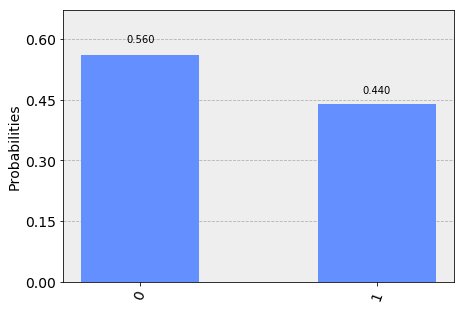

In [8]:
"""ANSWER: Getting a backend and running the circuit."""

# ==============================================
# get a backend for a quantum computer simulator
# ==============================================

backend = qiskit.Aer.get_backend("qasm_simulator")

# ==============================
# run the circuit on the backend
# ==============================

job = qiskit.execute(circ, backend, shots=100)
result = job.result()
counts = result.get_counts()

# ===================
# display the results
# ===================

qiskit.tools.visualization.plot_histogram(counts)

## <p style="text-align: center;"> Step 3: Extend the Random Number Generator </p>

You should have seen roughly equal frequencies of 0 and 1 outcomes above. Now, the problem we want to solve is this: <b>How can we write a quantum circuit that generates numbers in an arbitrary range?</b> In particular, we want to generate a random number between 0 and 31.

<b>Question:</b> How many bits are needed to store a number between 0 and 31? <i>Hint: Think back to Pre-Class 23. How did we store a letter of the alphabet using bits?</i>

<font size=8 color="#009600">&#9998;</font> <b>Answer:</b> Erase the contents of this cell and put your answer here!

Remember that when we measure a qubit, we get one bit of information. Therefore, to produce a random number between 0 and 31, we'll need the same number of qubits as the number of bits to store a number between 0 and 31 (i.e., your answer to the previous question).

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the following cell, use Qiskit to write a quantum circuit that can generate random numbers in the range 0 to 31.

In [10]:
"""Extending the random number generator."""


'Extending the random number generator.'

In [18]:
"""ANSWER: Extending the random number generator."""

# number of qubits and bits to use
n = 5

# ==========================
# creating a quantum circuit
# ==========================

qreg = qiskit.QuantumRegister(n)
creg = qiskit.ClassicalRegister(n)
circ = qiskit.QuantumCircuit(qreg, creg)

# =====================================================
# adding the operations for the random number generator
# =====================================================

for x in range(n):
    circ.h(qreg[x])

for x in range(n):
    circ.measure(qreg[x], creg[x])
    
# ========================
# draw the quantum circuit
# ========================

circ.draw()

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the following cell:

1. Execute the quantum circuit you've written using a quantum computer simulator backend.
1. Display the results of the frequency of ALL measurement outcomes using `1000` shots.

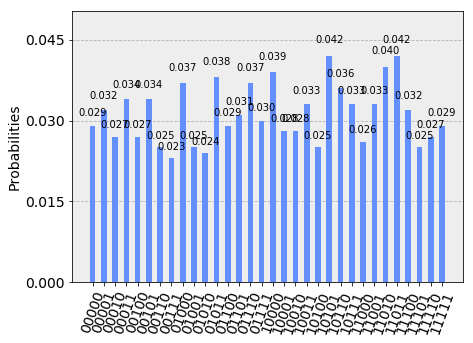

In [19]:
"""ANSWER: Getting a backend and running the circuit."""

# =================
# getting a backend
# =================

backend = qiskit.Aer.get_backend("qasm_simulator")

# ==================================
# running the circuit on the backend
# ==================================

job = qiskit.execute(circ, backend, shots=1000)
result = job.result()

# ======================
# displaying the results
# ======================

counts = result.get_counts()
qiskit.tools.visualization.plot_histogram(counts)

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the following cell:

1. Compute the most probable outcome (bit string) and convert it to an integer in the range 0-31.

<i>Hint:</i> You can get the key of a dictionary with the maximum value by doing `max(dictionary, key=dictionary.get)`.

<i>Hint:</i> In Python, ```int("10", 2)``` returns 2, and "10" is the integer 2 in binary.

In [20]:
"""Compute the random number in the range 0-31 from the output of the circuit."""


'Compute the random number in the range 0-31 from the output of the circuit.'

In [21]:
"""ANSWER: Compute the random number in the range 0-31 from the output of the circuit."""

# get the most probable outcome
max_string = max(counts, key=counts.get)

# print it out
print(max_string)

# convert the binary string to an integer
random_number = int(max_string, 2)

# print it out
print(random_number)

11011
27


## <p style="text-align: center;"> <font color="green"> -------- Optional: Executing on a Real Quantum Computer -------- </font> </p>

Now that you have a quantum circuit written, you can easily change the `backend` to run it on a real quantum computer rather than a quantum computer simulator. In order to use real quantum computers, you'll need to set up an account on the IBM Q website and get an API Token. If you haven't done this already, the steps are listed below.

1. Go to <a href="https://quantumexperience.ng.bluemix.net/qx/experience">https://quantumexperience.ng.bluemix.net/qx/experience</a>.
1. Click "Sign in" in the upper right.
1. Click "Sign up" in the dialogue box that opens.
1. Fill out the form.

Once you have an account:

1. Go to <a href="https://quantumexperience.ng.bluemix.net/qx/account/profile">https://quantumexperience.ng.bluemix.net/qx/account/profile</a>.
1. Click "Advanced" in the upper right of the page.
1. Copy your API Token into the cell below. (Should be a long string of digits and characters.)

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> Enter your API token between the quotes in the following cell.

In [23]:
"""Registering to use backends. This cell will throw an error until a valid API_TOKEN is entered."""

API_TOKEN = ""
qiskit.IBMQ.enable_account(API_TOKEN)

ConnectionError: Couldn't connect to IBMQ server: invalid token

In [24]:
"""ANSWER: Registering to use backends."""

# NOTE: student API tokens will of course be different. They should look something like this, though
API_TOKEN = "3ce852634bcc0d3fc6a5af0920aff9ad4be74ec6972f2a8e06b384796d4b28fd933c7386d2e1296ee5b0425afb317f75d44f558ba6ba18cd8fc899a1fe9fcbb8"
qiskit.IBMQ.enable_account(API_TOKEN)

Your account should now be enabled and you should be able to see quantum computers as `backends`. Run the following cell to see what backends are available.

In [25]:
"""ANSWER: Printing out all available backends."""
print(qiskit.IBMQ.backends())

[<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]


<b>Question:</b> What backends do you see? Which ones are real quantum computers?

<font size=8 color="#009600">&#9998;</font> <b>Answer:</b> Erase the contents of this cell and put your answer here!

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> Pick a quantum computer as a `backend` to run on in the following cell.

In [26]:
"""Select an available backend to use."""


'Select an available backend to use.'

In [27]:
"""ANSWER: Selecting a backend. Either ibmqx4 or ibmqx5, whichever is available.
Hopefully not all will be under maintenance during the assignment..."""
backend = qiskit.IBMQ.backends()[0]
print(backend)

ibmqx4


<b>Question:</b> Research the quantum computer you selected on the web and write some facts about it. (How many qubits does it have? When was it first put online?) This <a href="https://www.research.ibm.com/ibm-q/technology/devices/?cm_mc_uid=33310314350515297915720&cm_mc_sid_50200000=27450191553966364408">website</a> may be helpful.</a>

<font size=8 color="#009600">&#9998;</font> <b>Answer:</b> Erase the contents of this cell and put your answer here!

Now that you've selected a backend, pick one of the two circuits you wrote to run, and list it in the cell below.

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> Erase the contents of this cell and write which circuit you chose to execute here. (Random bit generator or random number generator.)

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the cell below, write code to run your circuit on a real quantum computer using Qiskit.

In [28]:
"""ANSWER: Running on a real quantum computer."""
job = qiskit.execute(circ, backend)

In [35]:
type(job.status())

<enum 'JobStatus'>

When you submit a circuit to be executed (a "job"), the job gets submitted to the queue, since these computers are available to everyone. The code below is provided to print out the queue position of your job until it executes. Depending on the time of day, your job could take a few minutes to a few hours to execute. Also note: General users only get so many "credits" to execute on quantum computers. (They regenerate, but it takes some time.)

In [30]:
"""Code for checking the status of a job submission.
ASSUMES the variable name of your job submission is "job".
"""
# TODO: figure out why my queue position is monotonically non-decreasing
import time
start = time.time()
while job.queue_position() and job.queue_position() > 1:
    print("Queue position = {}, Time elapsed = {} seconds.".format(job.queue_position(),
                                                          round(time.time() - start)), end="\r")
    time.sleep(10)

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the code cell below, make a histogram to display the frequencies of your results in the same way as the previous steps.

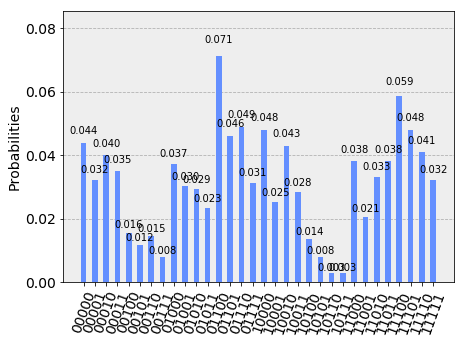

In [33]:
"""ANSWER: Make a histogram of output results here."""
result = job.result()
counts = result.get_counts()
qiskit.tools.visualization.plot_histogram(counts)

Congratulations! You just ran an algorithm on a quantum computer!

<p style="text-align: center;"> <font color="green"><i>-------------------- End optional problem.-------------------- </i></font> </p>

# <p style="text-align: center;"> Part 2: Quantum Teleportation Algorithm </p>

During In Class Assignment X, we talked about the differences between copying a bit and copying a qubit. To copy a bit, it's easy: you just look at the bit's value, record it, and write it into a new bit. For a qubit, on the other hand, which has a wavefunction which "gets destroyed" when you measure it, the problem is a bit more subtle. 

As copying information is such an important routine in communication and computation, you may wonder if there's anything we can do? Luckily, there is, but it involves <i>destroying the original qubit</i>! (There's really no free lunch with copying qubits!) It's called <b>quantum teleportation</b>, and it works as follows.

<img src="quantum-teleportation-circuit.png">

For clarity, let's say there's two people, Alice and Bob. Alice has some qubit $|\psi\rangle$ that she wants to send to Bob. Here's what happens. Alice starts with one qubit, Bob starts with two.

1. Bob prepares an <b>EPR pair</b> with two qubits, and sends one of them to Alice. (An EPR pair is a special pair of qubits that we'll cover in Step 1 below.)
1. Alice performs the same operations as Bob on her qubits <b>in reverse</b>, then measures both qubits.
1. Alice tells Bob her measurement results, which allows Bob to reconstruct the state $|\psi\rangle$ by performing the appropriate operations on his qubit.

We'll work through these in steps as you complete this problem.

## <p style="text-align: center;"> Step 1: Bob Prepares an EPR Pair </p>

To prepare an EPR pair, it's as easy as two operations, one of which we already know! A Hadamard gate!

The other operation is called a <b>Controlled-NOT operation</b>, or just <b>CNOT</b>. The CNOT gate acts on two qubits with the following effect:

\begin{align}
    \text{CNOT}|0\rangle |0\rangle &= |0\rangle |0\rangle \\
    \text{CNOT}|0\rangle |1\rangle &= |0\rangle |1\rangle \\
    \text{CNOT}|1\rangle |0\rangle &= |1\rangle |1\rangle \\
    \text{CNOT}|1\rangle |1\rangle &= |1\rangle |1\rangle
\end{align}

If you look closely, you'll see that the CNOT gate flips the second qubit IF the first qubit is $|1\rangle$ and does nothing otherwise. (The name makes sense! Control + NOT.)

Don't worry, you won't have to code how the CNOT gate works, Qiskit has this for you. You just need to implement it. 

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the following cell:

1. Create a quantum circuit with three qubits and three classical bits.
1. Perform a NOT operation on Alice's qubit -- the first (top) in the circuit. This will be the qubit (or message) she sends to Bob.
1. Prepare an EPR pair on Bob's qubits -- the last (bottom) two in the circuit. (<i>Hint: Look up how to perform a Controlled-NOT gate in Qiskit's documentation.</i>)
1. Draw your circuit diagram.

In [ ]:
"""ANSWER: Alice prepares a state, Bob makes an EPR pair.

NOTE: Barriers are not necessary for student's code, they're just here for clarity."""

# =======================================
# get a quantum circuit with three qubits
# =======================================

qreg = qiskit.QuantumRegister(3)
creg = qiskit.ClassicalRegister(3)
circ = qiskit.QuantumCircuit(qreg, creg)

# ==============================
# Alice prepares a qubit to send
# =============and=================

circ.x(qreg[0])
circ.barrier()

# ========================
# Bob prepares an EPR pair
# ========================

circ.h(qreg[1])
circ.cx(qreg[1], qreg[2])

# =====================
# print out the circuit
# =====================

circ.draw()

## <p style="text-align: center;"> Step 2: Alice Reverses Bob's Operations and Measures </p>

Now we imagine Bob sends his qubit to Alice, who could in theory be as far away as she wishes. Once Alice receives the qubit (which is right away for us), she reverses the operations that Bob performed on her two qubits and measures.

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> <b>Using your same quantum circuit from above</b>, add the following operations.

1. Perform a CNOT on Alice's two qubits (control on the one she originally had).
1. Perform a Hadamard gate on Alice's first qubit (the one she originally had).
1. Measure both of Alice's qubits.
1. Draw your circuit diagram.

In [ ]:
"""ANSWER: Perform the operations above and draw the circuit.

NOTE: Barriers are not necessary.
"""

# ==================
# Alice's operations
# ==================

circ.barrier()
circ.cx(qreg[0], qreg[1])
circ.h(qreg[0])

# ====================
# Alice's measurements
# ====================

circ.barrier()
circ.measure(qreg[0], creg[0])
circ.measure(qreg[1], creg[1])

# ================
# draw the circuit
# ================

circ.draw()

## <p style="text-align: center;"> Step 3: Bob Performs Conditional Operations </p>

Now we imagine that Alice sends the results of her measurements to Bob. Remember, her measurements are just bits, so there's no problem communicating them (which may involve copying) to Bob.

Bob then listens to Alice and acts accordingly on his qubit.

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> <b>Using your same quantum circuit from above</b>, add the following operations.

1. If Alice measured a 1 on her first qubit, perform a Z gate on Bob's qubit. (<i>Hint: Look up the `Z` gate in Qiskit's documentation.</i>)
1. If Alice measured a 1 on her SECOND qubit, perform a NOT gate on Bob's qubit.
1. Measure Bob's qubit.
1. Draw the circuit diagram.

In [ ]:
"""ANSWER: Perform the above operations on Bob's qubit.

NOTE: Barriers are again not necessary.
"""

# ======================
# conditional operations
# ======================

circ.z(qreg[2]).c_if(creg[0][0], 1)
circ.x(qreg[2]).c_if(creg[1][0], 1)

# =======================
# measure the Bob's qubit
# =======================

circ.barrier()
circ.measure(qreg[2], creg[2])

# =====================
# print out the circuit
# =====================

circ.draw()

## <p style="text-align: center;"> Step 4: Run the Circuit </p>

You've now written the entire quantum teleportation algorithm! Congrats! All that's left to do is execute the circuit in the same way we've done before.

<font size=8 color="#009600">&#9998;</font> <b>Do this:</b> In the following cell:

1. Get a quantum computer <b>simulator</b> as a backend.
1. Using your backend, execute your quantum teleportation circuit using 1000 `shots`.
1. Make a histogram of the frequency of the outcome measurements.

In [ ]:
"""ANSWER: Run the quantum teleportation circuit."""

# =============
# get a backend
# =============

backend = qiskit.Aer.get_backend("qasm_simulator")

# ==============================
# run the circuit on the backend
# ==============================

job = qiskit.execute(circ, backend, shots=1000)
result = job.result()

# ===================
# display the results
# ===================

counts = result.get_counts()
qiskit.tools.visualization.plot_histogram(counts)

<b>Question:</b> Make sense of your results by answering the following questions.

1. How many measurement outcomes are there total?
1. How many measurement outcomes do you see in your histogram?
1. If the quantum teleportation algorithm worked, what should Bob always measure?
1. Does this agree with your results above?

<font size=8 color="#009600">&#9998;</font> <b>Answer:</b> Erase the contents of this cell and put your answer here!

## <p style="text-align: center;"> <font color="green">Bonus: Running on a Real Quantum Computer</font> </p>

<p style="text-align: center;"> <font color="green"><i>-------------------- This problem is optional. --------------------</i></font> </p>

If you'd like, run the quantum teleportation algorithm on a quantum computer, following the same steps you did in the previous bonus problem.

<font size=8 color="#009600">&#9998;</font> <b>(Bonus) Do this:</b> In the cell below, execute your quantum algorithm on a real quantum computer. Display the frequency of the measurement outcomes in a histogram.

In [ ]:
"""Bonus: execute the quantum teleportation algorithm on a real quantum computer."""


<p style="text-align: center;"> <font color="green"><i>-------------------- End optional problem.-------------------- </i></font> </p>

# <p style="text-align: center;"> Part 3: Other Quantum Algorithms </p>

You've just written two quantum algorithms, congrats! The first quantum algorithm, the random number generator, is useful because it generates <i>truly random numbers</i> guarunteed by the laws of (quantum) physics. Random numbers have a lot of practical applications ranging including communication, cryptography, and computation, of course.

This isn't just an artificial example, either! Quantum random number generation is a real protocol used in academia and industry. For example, you can run the cell below to see an online quantum random number generator by researchers at the Austrailian National University.

In [ ]:
"""Livestream truly random numbers guarunteed by quantum physics!"""
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://qrng.anu.edu.au/RainBin.php" 
	width="80%" 
	height="+1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

The second algorithm, the quantum teleportation algorithm, is used for memory systems in quantum computers as well as in communication protocols for the quantum internet. (Read about the quantum internet being developed in Europe <a href="http://quantum-internet.team/">here</a> if you're interested.) Generating an EPR pair is also used in a lot of quantum cryptography applications as well.

One of the most exciting aspects of quantum computing is that some problems, though not all, can be solved a LOT faster on quantum computers than on classical computers. Shor's algorithm, a quantum algorithm for factoring numbers, is the most famous and what started the field. It got a lot of people interested because the security of, say, your credit card information when you buy something on Amazon is protected by the fact that no one has come up with a fast algorithm for factoring numbers on classical computers.

<b>Question:</b> Do a web search for other quantum algorithms and list at least three of them here, including what they're called, what they do, and any other information you can find. Cite your source(s).

<font size=8 color="#009600">&#9998;</font> **Answer:** Erase the contents of this cell and put your answer here!

Don't worry! Your credit card information and messages are still safe online! In principle, they could be hacked if we had a big enough quantum computer, but currently we don't. Not even close! Building a good quantum computer with many qubits is one of the biggest engineering challenges facing many technology companies like IBM, Microsoft, Rigetti, and Google today. (And also academics as well! The <a href="https://www.hybridquantumlab.com/">Labratory for Hybrid Quantum Systems (LHQS)</a> at MSU and run by Dr. Johannes Pollanen works on qubit technologies based on electrons on the surface of helium.)

<b>Question:</b> Do a web search to find out some challenges in building quantum computers. List at least two of them here. Cite your source(s).

<font size=8 color="#009600">&#9998;</font> **Answer:** Erase the contents of this cell and put your answer here!

Even with these challenges, the problem of demonstrating a computational speedup on a quantum computer is the million dollar question... literally! If you come up with a quantum algorithm and prove it's faster than any existing algorithm on a current classical computer, you're entitled to a million dollars from a quantum computing company called Rigetti. (Read about the "Quantum Advantage Prize" <a href="https://medium.com/rigetti/quantum-advantage-prize-rules-and-criteria-81c35256e4df">here</a> if you're interested.)

And of course, the question of <i>what else</i> we could do with a good quantum computer is one of the most interesting and exciting questions in physics and computational science today.

# <p style="text-align: center;"> Assignment Wrap-up </p>

Take a moment to fill out the following brief survey to complete your assignment.

## <p style="text-align: center;"> Survey </p>

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/AgAUQ5ckrnv1VZG82" 
	width="80%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## <p style="text-align: center;"> Congrats, You're Finished! </p>

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder. (Don't forget to add your name in the first cell.)

<p style="text-align: right;"><b>&#169; Copyright 2019, Michigan State University Board of Trustees.</b></p>